In [2]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine import ggplot, aes, geom_bar, labs, scale_fill_manual
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, labs
import calendar

In [40]:
# read in data and change data types
skus = pd.read_csv("../data.csv")

skus['Qty Sold'] = skus['qtySold']
skus['Days Since First Pick'] = skus['days_since_first_pick']

skus['SKU'] = skus['itemSkuNumber'].astype('object')
skus['SKU Created At'] = pd.to_datetime(skus['created_date'])
skus['Month Created'] = skus['month_created'].astype('object')
skus['Week Start'] = pd.to_datetime(skus['week_start'])
skus['Month of Sales'] = skus['sales_month'].astype('object')
#skus['Size'] = skus['Size'].astype('string')
skus['Gender'] = skus['skuLine'].astype('string')
skus['SKU Type'] = skus['type'].astype('string')
skus['Date First Picked'] = pd.to_datetime(skus['first_pick'])
skus['Month of First Pick'] = skus['Date First Picked'].dt.month.astype('object')

skus.loc[skus['SKU Type'] == 'tumbler', 'SKU Type'] = 'Tumbler'

#print(skus.dtypes)

skus.dropna(inplace=True)

#skus = skus[skus['days_since_first_pick'] <=  100]
# summary_stats = skus.describe(include='all').T
# summary_stats['unique'] = skus.nunique()
# print(summary_stats)

print(skus['type'].value_counts())
print(skus['skuLine'].value_counts())


type
Shirt                    70609
Hoodie                   21713
Other                    15738
Pants/Shorts             11084
Hat                      10988
Jacket                    6281
Kit                       3690
Tote / Bag                2560
Coat                      2078
Tumbler                   1662
Backpack / Duffel Bag     1607
Card / Sticker Sheet      1461
Headcover                 1326
Blanket                   1091
Beanie                    1013
Socks                      940
Headphones                 780
Pen/Pencil                 532
Lanyard/Keychain           521
Glasses                    399
Journal                    381
Button                     366
Jewelry                    254
Shirt Pack                 252
Belt                       221
Shoes                      192
Wallet                     153
Name: count, dtype: int64
skuLine
Uni      97255
Men      56109
Women     4528
Name: count, dtype: int64


In [45]:
unique_skus = skus.drop_duplicates(subset=['SKU', 'SKU Type', 'Gender'])

from plotnine import ggplot, aes, geom_bar, labs, ggsave

plot = (ggplot(unique_skus) +
 aes(x='Gender', fill='SKU Type') +
 geom_bar(position='stack') +
 labs(title='Counts of Each Unique SKU by Gender and SKU Type', x='Gender', y='Count'))


ggsave(plot, filename='type_gender_counts.png', width=10, height=6, dpi=300)


/Users/daphnelesueur/anaconda3/envs/stat386b/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 10 x 6 in image.
/Users/daphnelesueur/anaconda3/envs/stat386b/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: type_gender_counts.png


In [67]:
filtered_data = skus[(skus['Qty Sold'] > 0) & (skus['Qty Sold'] <= 50)]
from plotnine import ggplot, aes, geom_histogram, labs

# Create histogram of 'Qty Sold'
plot = (ggplot(filtered_data) +
        aes(x='Qty Sold') +
        geom_histogram(binwidth=1, fill='lightblue', color='black', alpha=0.7) +
        labs(title='Distribution of Sales', x='Quantity Sold', y='Frequency'))

ggsave(plot, filename='distribution_of_sales.png', width=10, height=6, dpi=300)


/Users/daphnelesueur/anaconda3/envs/stat386b/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 10 x 6 in image.
/Users/daphnelesueur/anaconda3/envs/stat386b/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: distribution_of_sales.png


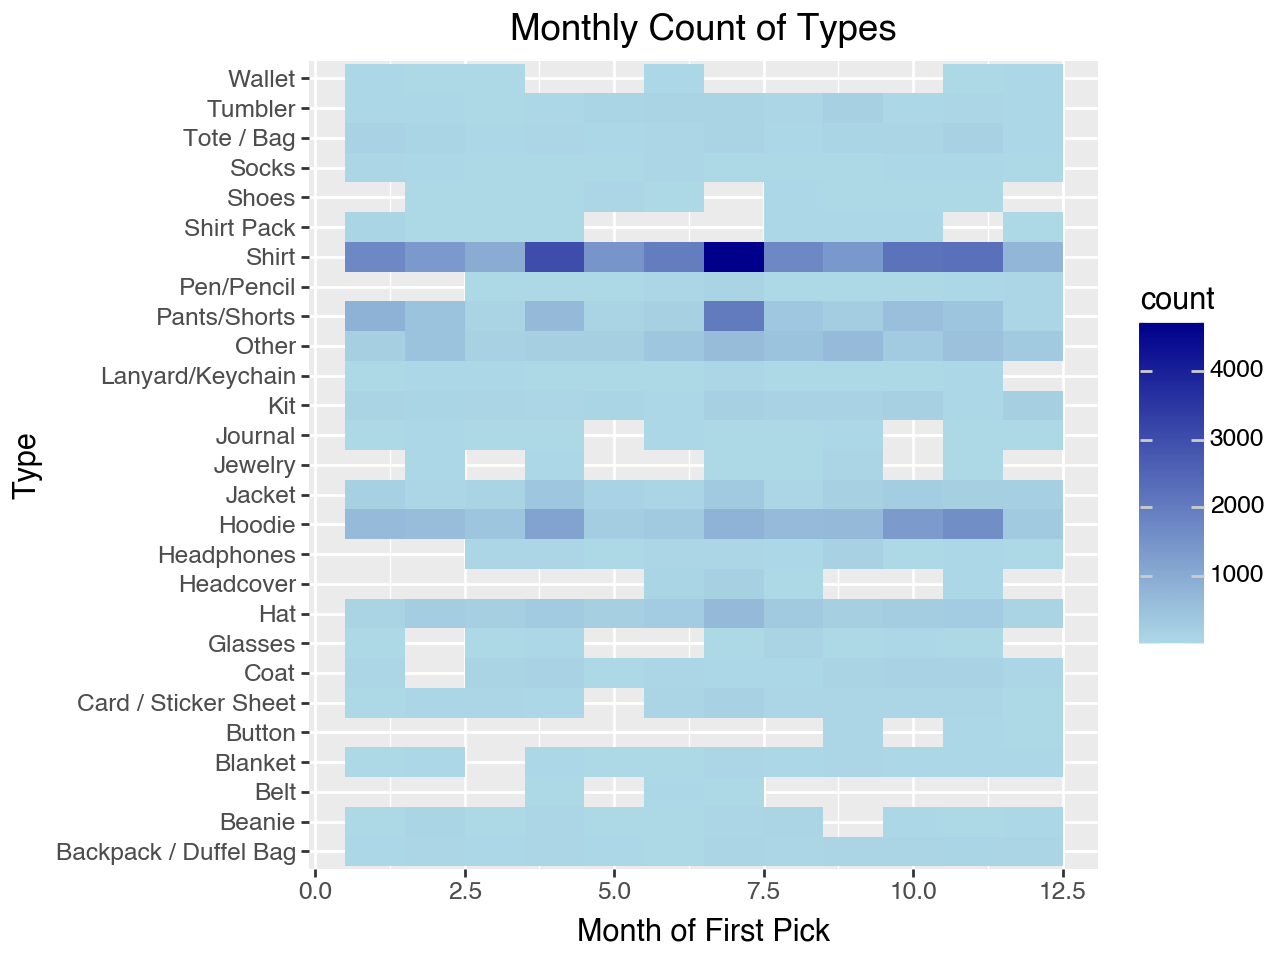

In [26]:
# heat map of SKU type and month first picked

# monthly counts
monthly_type_counts = skus.groupby(['Month of First Pick', 'SKU Type']).size().reset_index(name='count')

# Heatmap plot
(ggplot(monthly_type_counts) +
 aes(x='Month of First Pick', y='SKU Type', fill='count') +
 geom_tile() +
 labs(title='Monthly Count of Types', x='Month of First Pick', y='Type') +
 scale_fill_gradient(low="lightblue", high="darkblue"))

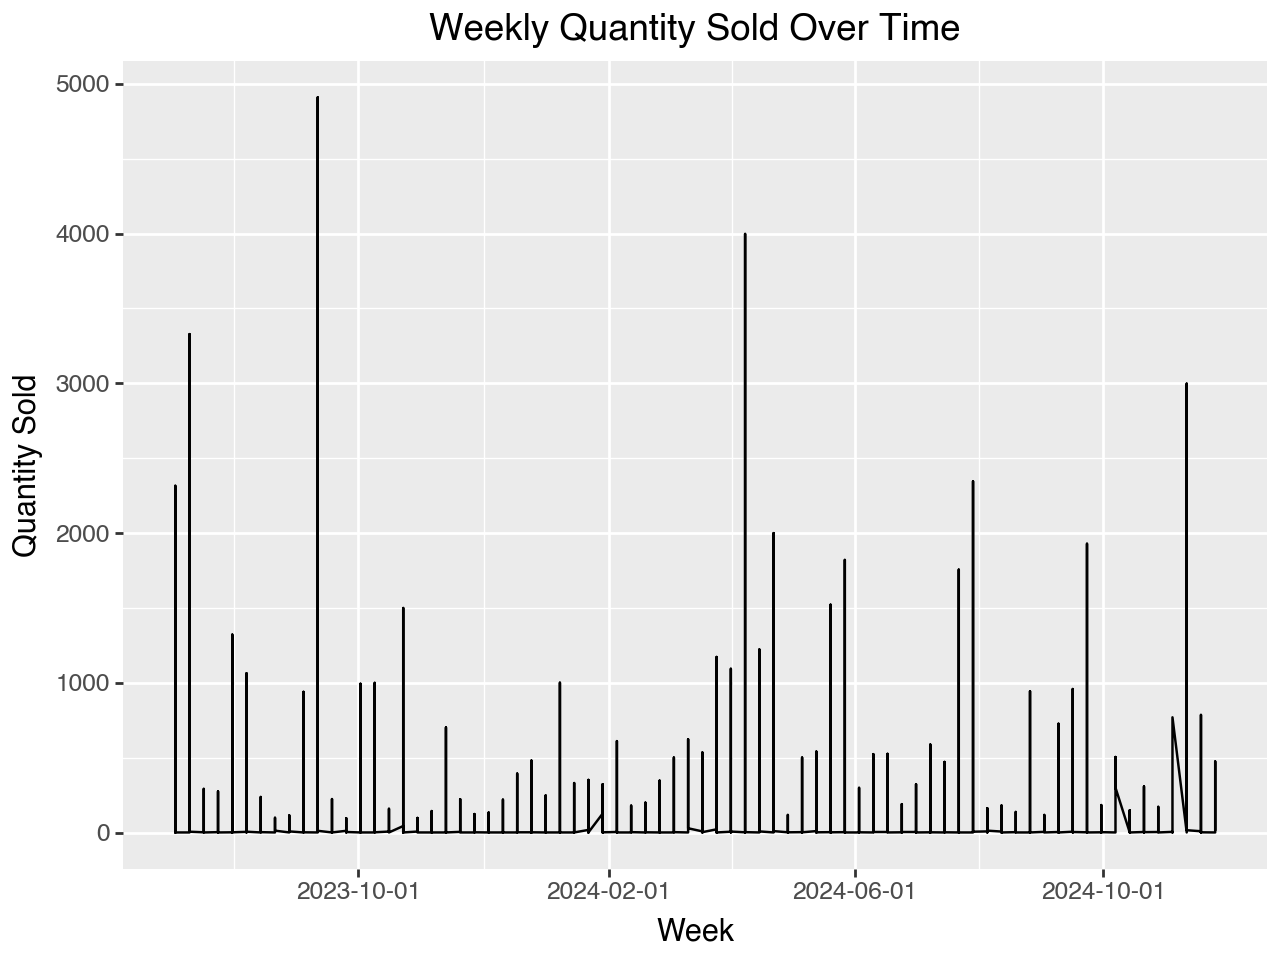

In [27]:
(ggplot(skus) +
 aes(x='Week Start', y='Qty Sold') +
 geom_line() +
 labs(title='Weekly Quantity Sold Over Time', x='Week', y='Quantity Sold'))


In [74]:
(ggplot(skus) +
 aes(x='Days Since First Pick') +
 geom_histogram(binwidth=10) +
 labs(title='Distribution of Days Since First Pick', x='Days Since First Pick', y='Frequency'))

plot = (ggplot(skus) +
                aes(x='Days Since First Pick', y='Qty Sold') +
                geom_point(color='lightcoral', alpha=0.6) +  # Use points with some transparency
                labs(title='Scatter Plot of Days Since First Pick vs Qty Sold', 
                     x='Days Since First Pick', 
                     y='Quantity Sold'))
ggsave(plot, filename='scatter_plot.png', width=10, height=6, dpi=300)


/Users/daphnelesueur/anaconda3/envs/stat386b/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 10 x 6 in image.
/Users/daphnelesueur/anaconda3/envs/stat386b/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: scatter_plot.png


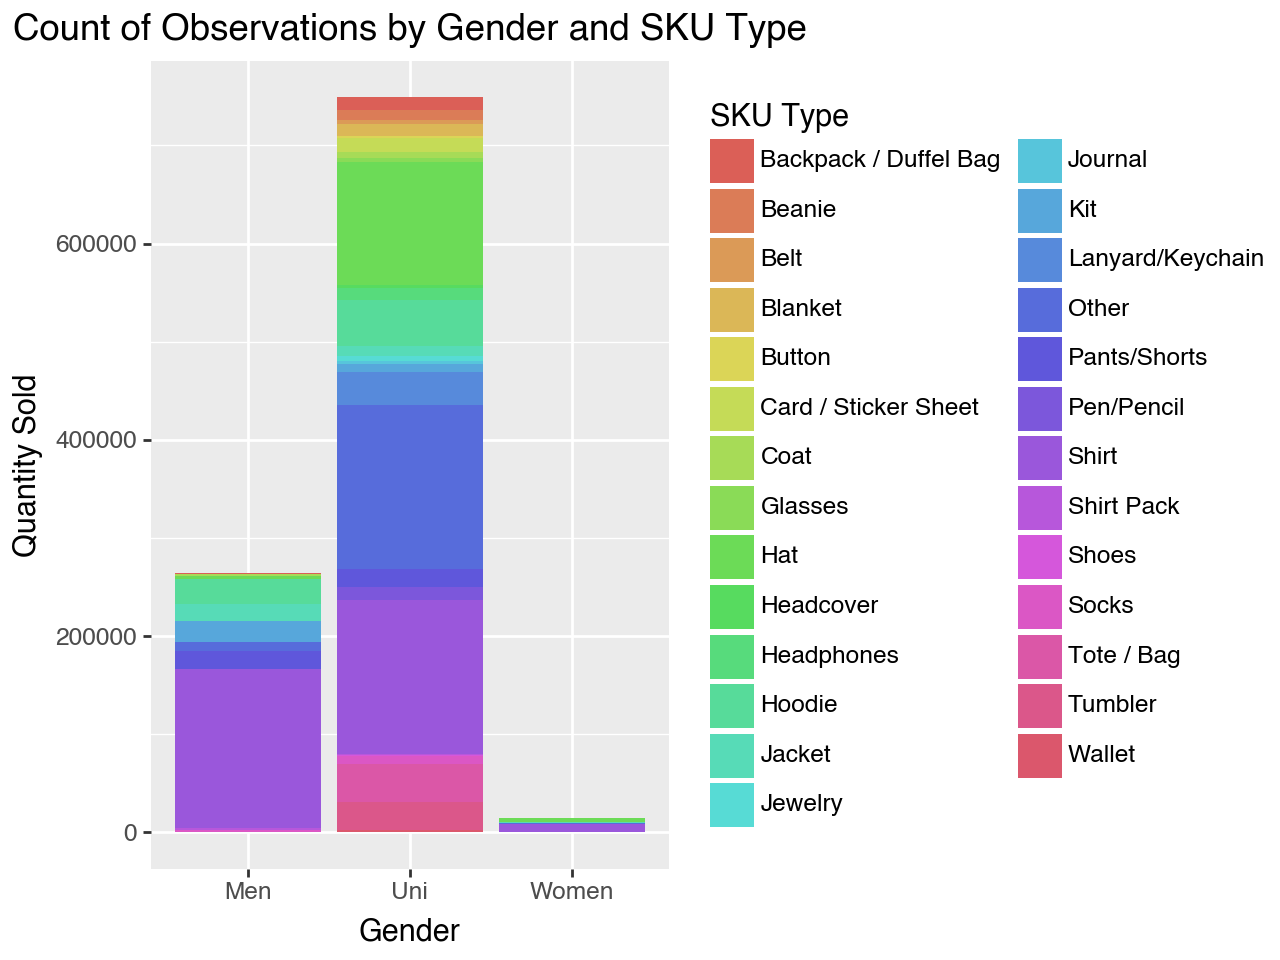

In [33]:
(ggplot(skus) +
 aes(x='Gender', y = 'Qty Sold', fill='SKU Type') +
 geom_bar(position="stack", stat="identity") +
 labs(title='Count of Observations by Gender and SKU Type', x='Gender', y='Quantity Sold'))


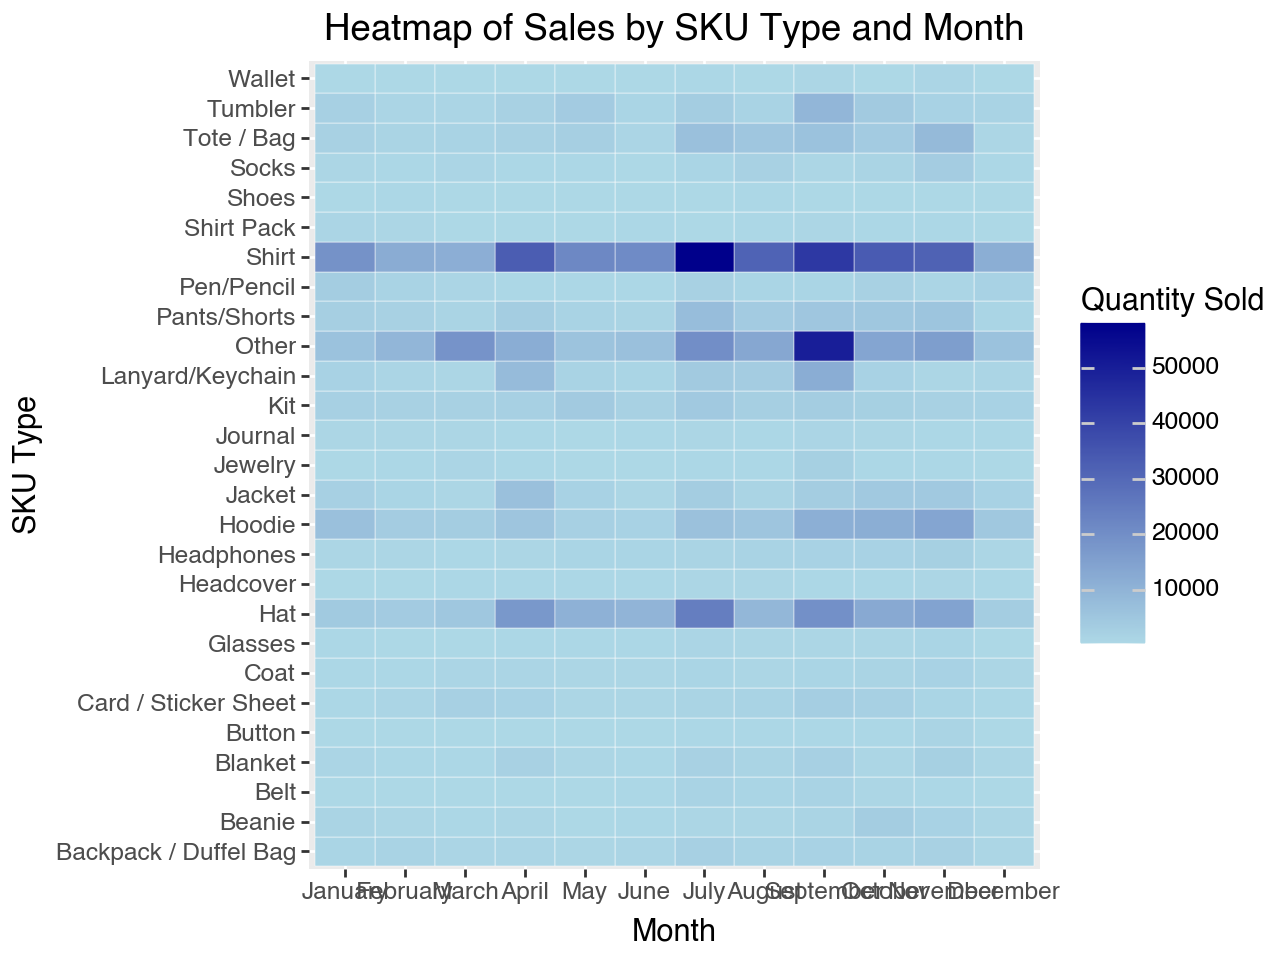

In [24]:
# Add 'Month' column
skus['Month'] = skus['Week Start'].dt.month_name()  # Gets the month name (e.g., 'January')

# Aggregate Qty Sold by SKU Type and Month
heatmap_data = skus.groupby(['SKU Type', 'Month'])['Qty Sold'].sum().reset_index()

# Ensure the month ordering is logical in the plot
heatmap_data['Month'] = pd.Categorical(
    heatmap_data['Month'], 
    categories=[calendar.month_name[i] for i in range(1, 13)], 
    ordered=True
)

# Plot the heatmap
(ggplot(heatmap_data) +
 aes(x='Month', y='SKU Type', fill='Qty Sold') +
 geom_tile(color='white') +
 scale_fill_gradient(low='lightblue', high='darkblue') +
 labs(title='Heatmap of Sales by SKU Type and Month', x='Month', y='SKU Type', fill='Quantity Sold'))

In [33]:
skus.describe()

,SKU Created At,Week Start,Qty Sold,Days Since First Pick,Date First Picked
count,144,144,144.000000,144.000000,144
mean,2022-10-31 00:10:00,2024-01-12 10:10:00,55.534722,371.548611,2023-01-05 14:40:00
min,2020-10-29 00:00:00,2023-07-10 00:00:00,1.000000,-5.000000,2020-11-05 00:00:00
25%,2021-09-22 00:00:00,2023-10-09 00:00:00,1.000000,-4.000000,2022-03-10 00:00:00
50%,2023-02-03 00:00:00,2023-12-11 00:00:00,10.000000,245.000000,2023-02-06 00:00:00
75%,2024-05-22 00:00:00,2024-06-03 00:00:00,50.000000,640.250000,2024-06-06 00:00:00
max,2024-06-13 00:00:00,2024-09-09 00:00:00,1606.000000,1138.000000,2024-08-01 00:00:00
std,NaN,NaN,187.511936,355.645436,NaN


In [38]:
# Select categorical variables
categorical_vars = skus.select_dtypes(include=['object', 'category', 'string'])
print(categorical_vars)
categorical_var_names = skus.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
print(categorical_var_names)

          SKU Month Created Month of Sales Size Gender    SKU Type  \
0    90507760            11              7   6M   Kids      Onesie   
1    90507761            11              7  12M   Kids      Onesie   
2    90506665             9              9    M    Men   Sweatpant   
3    90517846            12              9   XL    Men  Sweatshirt   
4    90517919            12              9    M  Women  Sweatshirt   
..        ...           ...            ...  ...    ...         ...   
139  78708352             6              8   OS    Uni         Hat   
140  78708353             6              8   OS    Uni         Hat   
141  78708352             6              8   OS    Uni         Hat   
142  78708352             6              9   OS    Uni         Hat   
143  78708353             6              9   OS    Uni         Hat   

    Month of First Pick      Month  
0                    12       July  
1                    11       July  
2                     3  September  
3          

In [40]:
for var in categorical_var_names:
    print(var)
    print(skus[var].value_counts())


SKU
SKU
78708352    5
90556923    4
90556932    4
78708353    3
90556926    3
           ..
90506668    1
90506667    1
90506666    1
90506664    1
90506670    1
Name: count, Length: 100, dtype: int64
Month Created
Month Created
2     43
5     32
1     17
9     15
6     13
3      7
11     6
7      4
12     3
10     3
8      1
Name: count, dtype: int64
Month of Sales
Month of Sales
12    58
6     32
10    27
9     17
7      6
8      3
4      1
Name: count, dtype: int64
Size
Size
OS         38
M          19
L          14
S          11
XL         10
2XL         9
3XL         9
6           4
4XL         4
XS          4
10          3
12          3
4           3
8           3
12-18MO     2
6M          2
18          2
14          2
12M         1
5XL         1
Name: count, dtype: Int64
Gender
Gender
Men      72
Uni      38
Women    29
Kids      5
Name: count, dtype: Int64
SKU Type
SKU Type
Sweatshirt         37
Hoodie             25
Sweatpant          11
SS Shirt           11
Hat              